In [1]:
import os
# ^^^ pyforest auto-imports - don't write above this line
#this code will helps us to plot the time difference between predicted and picked arrivals time. input files are from
#bash script with name "get picks for each station.sh"
import matplotlib.dates as dates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats
import matplotlib.pyplot as pls
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.dates import DateFormatter, WeekdayLocator, MonthLocator, DayLocator, MONDAY
import matplotlib.dates as mdates

In [2]:
tele_files=[]
files=os.listdir(os.getcwd())
for file in files:
    if file.endswith("csv"):
        print(file)
        tele_files.append(file)

2020041808253_M6.6.csv
2020053018134_M5.6.csv
2020061004292_M5.9.csv
2020052023431_M5.7.csv
2020050311542_M5.9.csv
2020050711211_M6.1.csv
2020060315540_M5.7.csv
2020041716304_M5.8.csv
2020051603154_M5.9.csv
2020042502530_M6.2.csv
2020051023583_M5.8.csv
2020060720063_M5.9.csv
2020052323022_M5.6.csv
2020051823223_M5.8.csv
2020050413074_M5.6.csv
2020052707091_M6.1.csv
2020061321083_M6.2.csv
2020041920390_M6.3.csv
2020060904561_M5.6.csv
2020050212510_M6.6.csv
2020041809241_M5.7.csv
2020050820453_M5.5.csv
2020060917181_M5.7.csv
2020053013062_M5.5.csv
2020050613535_M6.8.csv
2020061315512_M6.6.csv
2020051222411_M6.6.csv
2020060714432_M5.7.csv
2020060916085_M5.5.csv
2020060408493_M6.4.csv
2020060714365_M5.7.csv


In [3]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))


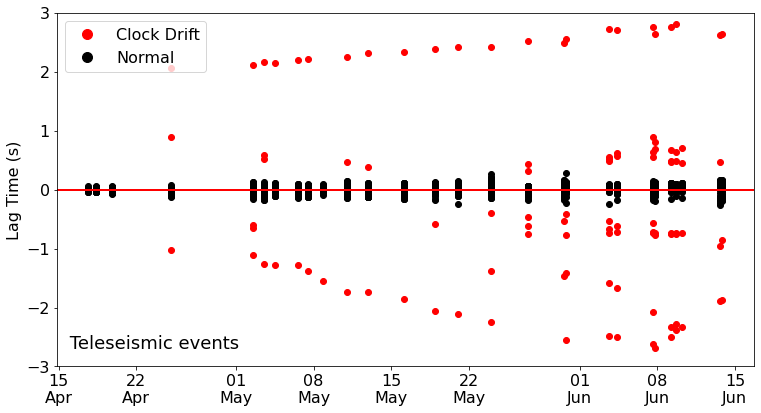

In [17]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

from datetime import datetime
matplotlib.rcParams.update({'font.size': 16})

fig =plt.figure(figsize=(12.5,6.5))
ax1=fig.add_subplot(1,1,1)

plt.ylim(-3,3)
for file in tele_files:
    date=f"{file[0:4]}/{file[4:6]}/{file[6:8]} {file[8:10]}:{file[10:12]}:{file[12:13]}0"
    date=datetime.strptime(date,"%Y/%m/%d %H:%M:%S")
    f = open(file, "r")
    for x in f:
        no,lag,_sta=x.split()
        if float(lag) > 0.3  or float(lag) < -0.3:

            ax1.scatter(date,float(lag[0:7]),color='red',label="Clock Drift")
        elif  0.3 > float(lag) > -0.3:
            ax1.scatter(date,float(lag[0:7]),color='black',label="Normal")

ax1.axhline(y=0,color='red',linestyle='-', linewidth = 2.0)

date_form = DateFormatter("%d")
loc = mdates.WeekdayLocator(interval=2)
ax1.xaxis.set_minor_locator(dates.MonthLocator())
fmt = mdates.DateFormatter('%d\n%b')
ax1.xaxis.set_major_formatter(fmt)
ax1.set_ylabel('Lag Time (s)')

ax1.annotate(" Teleseismic events", xy=(0.01, 0.05), xycoords="axes fraction",fontsize = 18.0, backgroundcolor='white',alpha=1)

#legend_without_duplicate_labels(ax1)

colors = ['red', 'black']
#custom = [Line2D([], [], marker='.', markersize=20, color='b', linestyle='None'),
    #      Line2D([], [], marker='.', markersize=20, color='r', linestyle='None')]

lines = [Line2D([0], [0], color=c, marker='.', markersize=20, linestyle='None') for c in colors]
labels = ['Clock Drift', 'Normal']
plt.legend(lines, labels,loc='upper left')

plt.savefig('tele_lag_land.jpeg')
plt.savefig('tele_lag_time.pdf')